# Data

The data (available in the data folder) was obtained from https://github.com/robjhyndman/fpp2-package/tree/master/data. In particular, it was converted to csv with the help of this Hyndman's post: https://robjhyndman.com/hyndsight/ts2csv/

# Equivalent to ts objects

*y <- ts(c(123,39,78,52,110), start=2012)*

In [1]:
import pandas as pd
import numpy as np

In pandas, there are two types of "date" types which can be useful: *pd.Timestamp* and *pd.Period*. Usually, the former refers to a specific point in time, and the latter is a period of time. As an example, we are going to use Periods here...

We have to create the range of periods first (by means of *pd.period_range*) and then we assign those values to the index of a pandas series. Being the index will make the queries to the *ts* object more performant.

In [2]:
samples = [123,39,78,52,110]
first_year = 2010
period_range = pd.period_range(str(first_year), periods=len(samples), freq='Y')
y = pd.Series(samples, index=period_range)

In [3]:
print(y)

2010    123
2011     39
2012     78
2013     52
2014    110
Freq: A-DEC, dtype: int64


*y <- ts(z, start=2003, frequency=12)*

In [4]:
number_samples = 12
first_month = '01/2010'
period_range = pd.period_range(str(first_month), periods=number_samples, freq='M')
yy = pd.Series(np.random.randint(0, 200, size=(number_samples,)), index=period_range)

In [5]:
print(yy)

2010-01     89
2010-02     73
2010-03    100
2010-04     87
2010-05    167
2010-06     34
2010-07    109
2010-08    167
2010-09     58
2010-10    106
2010-11    115
2010-12    136
Freq: M, dtype: int64


# Time plot

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

We first generate some data

/Users/mlmarenchino/.virtualenv/timeseries/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/mlmarenchino/.virtualenv/timeseries/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


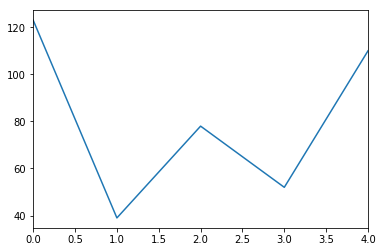

In [7]:
sns.tsplot(y)

:( that function is **deprecated**. Google suggests to use lineplot instead

In [8]:
sns.lineplot(data=y)

TypeError: Axis must have `freq` set to convert to Periods

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1144cebf8> (for post_execute):


ValueError: view limit minimum -0.05500000000000001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -0.05500000000000001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

It turns out that lineplot does not work correctly with *pd.Period*s. Let's try with *pd.Timestamp*

In [9]:
samples = [123,39,78,52,110]
first_year = 2010
period_range = pd.date_range(str(first_year), periods=len(samples), freq='Y')
y = pd.Series(samples, index=period_range)

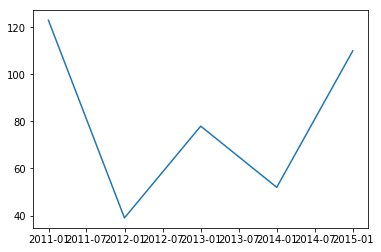

In [10]:
sns.lineplot(data=y);

# Seasonal plots

In [11]:
x = np.linspace(0, 36*np.pi, 36)
samples = np.sin(x) + np.random.rand(36)
first_year = 2013
period_range = pd.date_range(str(first_year), periods=len(samples), freq='M')
y = pd.Series(samples, index=period_range)

*y* is going to be our initial time series. Now, we'll have to perform a lot of convertions to have the data separated by year :S

In [12]:
# y.name = "SomeRandomValues"
yy = y.to_frame()
yy["Month"] = yy.index.month
yy["Year"] = yy.index.year

pivot = pd.pivot_table(yy, index=["Month"], columns=["Year"])

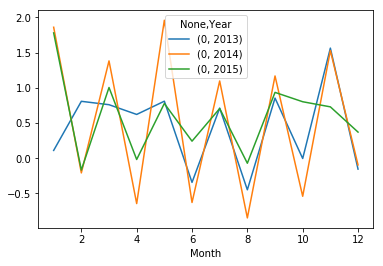

In [13]:
pivot.plot();

Let's omit the polar plot for now... You can find how to do it here: https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way

# Seasonal subseries plots

**TODO**

# Scatterplots

In [14]:
df = pd.read_csv("./data/elecdemand.csv")
index = pd.to_datetime(df.iloc[:,0])
df = df.drop(df.columns[0], axis=1)
df = df.set_index(index)

We are adding the previous snipped as the function *load_csv_timestamp* in *forecast_utils.py*.

In [15]:
import matplotlib.pyplot as plt

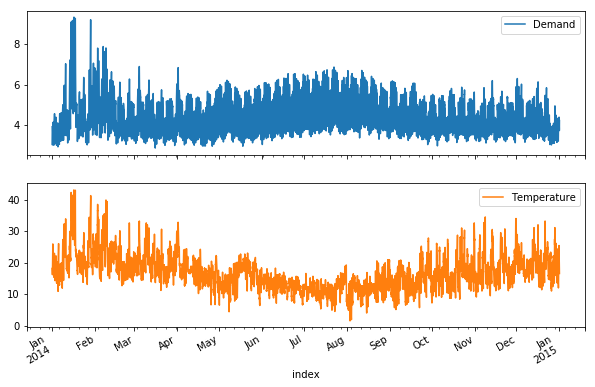

In [16]:
df.drop(df.columns[1], axis=1).plot(subplots=True, layout=(3, 1), figsize=(10,10));

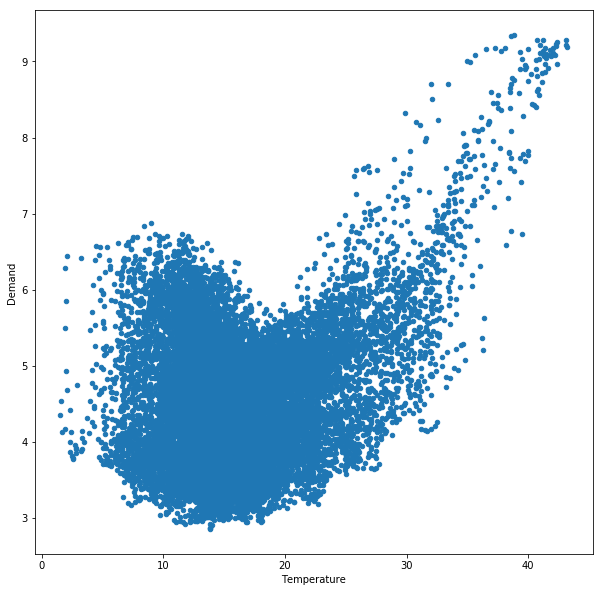

In [17]:
df.plot(x="Temperature", y="Demand", kind="scatter", figsize=(10,10));

In [18]:
df = pd.read_csv("./data/visnights.csv")
index = df.iloc[:,0].str.split().str.join(sep="")                                                                                                                     
index = pd.to_datetime(index)
df = df.drop(df.columns[0], axis=1)
df = df.set_index(index)

We are also adding the previous snipped as the function *load_csv_quarters* in *forecast_utils.py*.

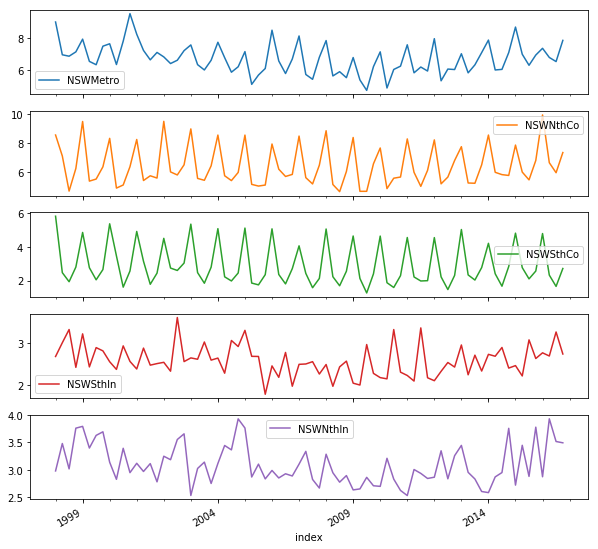

In [19]:
df.iloc[:,:5].plot(subplots=True, figsize=(10,10));

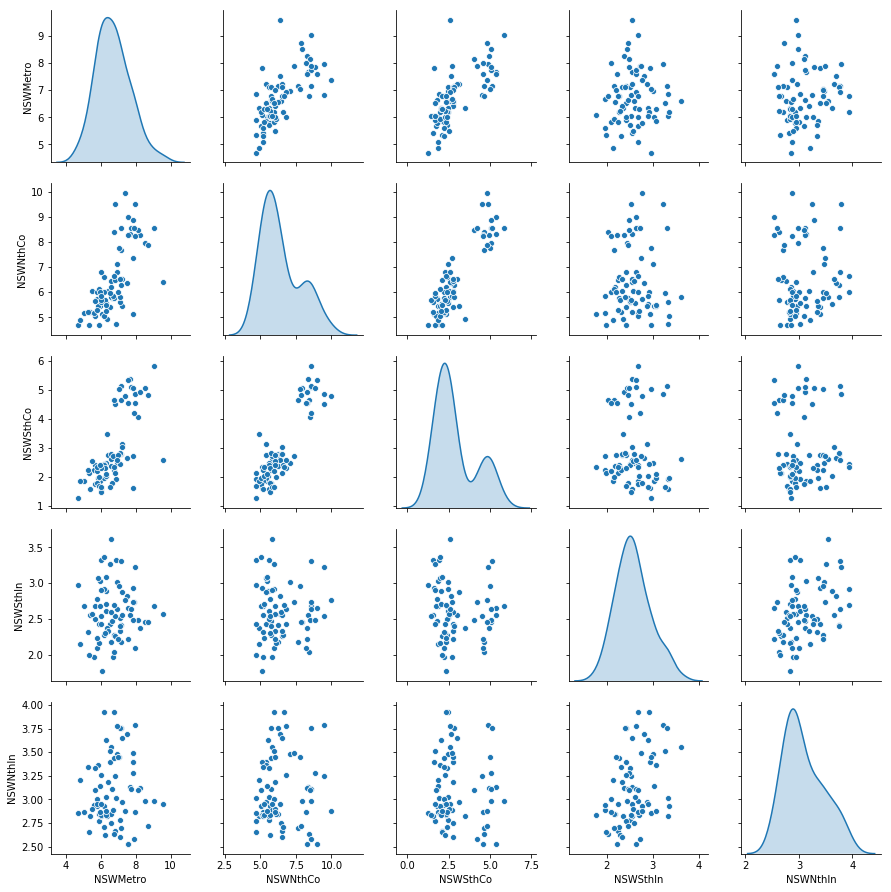

In [20]:
sns.pairplot(df.iloc[:,:5], diag_kind="kde");

# Lag plots

**TODO**

In [21]:
import forecast_utils as utils

In [22]:
df = utils.load_csv_quarters("./data/ausbeer.csv")

# Autocorrelation

In [23]:
df = utils.load_csv_timestamp("./data/elec.csv")

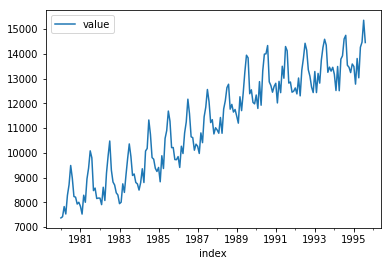

In [24]:
df.loc['1980':].plot();

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

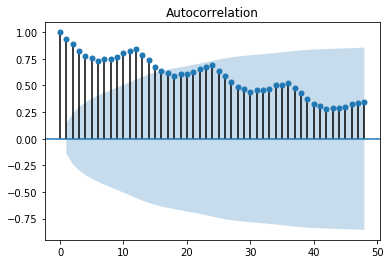

In [26]:
plot_acf(df.loc['1980':], lags=48);

# White noise

In [27]:
np.random.seed = 42
df = pd.DataFrame(np.random.normal(size=50))

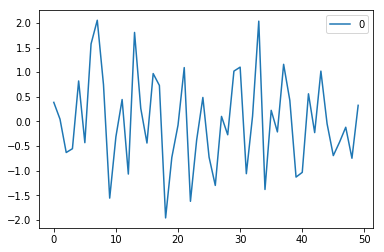

In [28]:
df.plot();

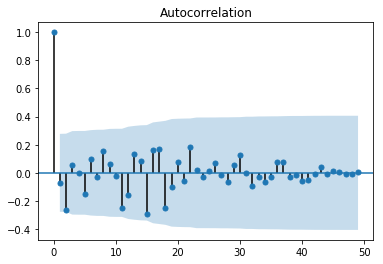

In [29]:
plot_acf(df);